# CASO PRÁCTICO 1


Imagina que te han asignado como coordinador académico
de la “Universidad UMNI” y te piden llevar un
control más detallado del avance de los Profesores y
sus alumnos para el siguiente semestre.

Te piden determinar
cuáles son los 3 profesores que no podrán seguir
impartiendo clases en 2021 dependiendo de los datos.

## ELEMENTOS A CONSIDERAR:
* Cuánto le cuesta a la universidad cada
profesor por clase.
* Nivel de satisfacción de los alumnos
por profesor.
* Número de faltas por año por profesor.

Concluir cuales son los profesores
menos eficientes para la Universidad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = pd.read_excel('Reportedeprofesores-201009-153239.xlsx')

# Análisis Exploratorio de Datos

In [3]:
data.head()

,Profesores,Numero de clases que imparte,Salario,Satisfaccion de alumnos,Faltas del prfesor por año
0,JUAN,2.0,34338.0,5.0,7.0
1,JOSÉ LUIS,4.0,33038.0,10.0,16.0
2,JOSÉ,5.0,24660.0,10.0,11.0
3,MARÍA GUADALUPE,4.0,33744.0,10.0,3.0
4,FRANCISCO,2.0,24322.0,5.0,0.0


In [4]:
data.dtypes

Profesores                       object
Numero de clases que imparte    float64
Salario                         float64
Satisfaccion de alumnos         float64
Faltas del prfesor por año      float64
dtype: object

In [5]:
data.describe()

,Numero de clases que imparte,Salario,Satisfaccion de alumnos,Faltas del prfesor por año
count,100.000000,100.000000,100.000000,100.000000
mean,3.020000,34921.250000,6.310000,9.720000
std,1.428286,8550.690299,2.600291,5.911946
min,1.000000,20209.000000,2.000000,0.000000
25%,2.000000,28088.750000,4.000000,4.750000
50%,3.000000,34650.500000,6.000000,10.000000
75%,4.000000,42259.250000,9.000000,15.000000
max,5.000000,49919.000000,10.000000,20.000000


In [6]:
data2 = data.copy()
data2['Salario por clase'] = data2['Salario'].divide(data2['Numero de clases que imparte'])
data2.head()

,Profesores,Numero de clases que imparte,Salario,Satisfaccion de alumnos,Faltas del prfesor por año,Salario por clase
0,JUAN,2.0,34338.0,5.0,7.0,17169.0
1,JOSÉ LUIS,4.0,33038.0,10.0,16.0,8259.5
2,JOSÉ,5.0,24660.0,10.0,11.0,4932.0
3,MARÍA GUADALUPE,4.0,33744.0,10.0,3.0,8436.0
4,FRANCISCO,2.0,24322.0,5.0,0.0,12161.0


In [7]:
data2.describe()

,Numero de clases que imparte,Salario,Satisfaccion de alumnos,Faltas del prfesor por año,Salario por clase
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.020000,34921.250000,6.310000,9.720000,15672.042167
std,1.428286,8550.690299,2.600291,5.911946,10937.129556
min,1.000000,20209.000000,2.000000,0.000000,4662.600000
25%,2.000000,28088.750000,4.000000,4.750000,8254.325000
50%,3.000000,34650.500000,6.000000,10.000000,11140.750000
75%,4.000000,42259.250000,9.000000,15.000000,20917.750000
max,5.000000,49919.000000,10.000000,20.000000,49742.000000


# Se buscarán los profesores menos eficientes

## Forma 1. Se busca destacar los profesores con mayores faltas, mayor salario por clase y menor satisfacción de alumnos

In [8]:
def yvalues(xvalues, pto1, pto2):
    y = [(pto2[1]-pto1[1])/(pto2[0]-pto1[0])*(x-pto1[0])+pto1[1] for x in xvalues]
    return y

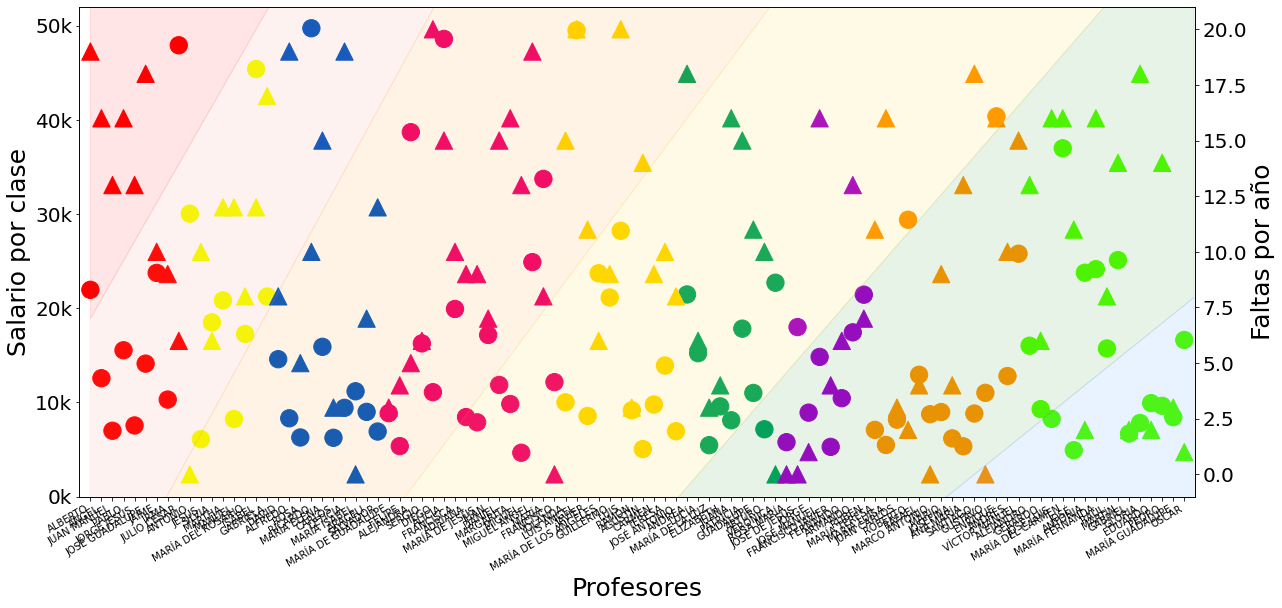

In [9]:
data3 = data2.copy()
data3.sort_values(by=['Satisfaccion de alumnos'], inplace=True, ignore_index=True)

#Se escogen los colores con base al nivel de satisfacción
c = [int(i) for i in data3['Satisfaccion de alumnos']]
x = data3['Profesores']#[i for i in range(len(data3))]

# create figure and axis objects with subplots()
fig,ax1 = plt.subplots(figsize=(20,10))
# matplotlib.style.use('ggplot')

pos = ax1.scatter(x, data3['Salario por clase'], c=c, cmap='prism', s=300)
ax1.set_ylabel('Salario por clase', fontsize=25)
ax1.set_xlabel('Profesores', fontsize=25)

nsticks=5
y = np.array([10000*i for i in range(nsticks+1)])
my_yticks = [f"{int(y_value/1000)}k" for y_value in y]
plt.yticks(y, my_yticks, fontsize=20)

# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
ax2.scatter(x, data3['Faltas del prfesor por año'], c=c, cmap='prism', marker="^", s=300)
ax2.set_ylabel('Faltas por año', fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=5)

#Se grafica el nivel de eficiencia
alpha = 0.1
x_ = [0.1*i for i in range(1000)]
y1 = yvalues(x_, [0, 7], [15, 20])
ax2.fill_between(x_, y1, 25, alpha=alpha, color='red')
y2 = yvalues(x_, [8, 0], [30, 20])
ax2.fill_between(x_, y2, y1, alpha=alpha, color='salmon')
y3 = yvalues(x_, [30, 0], [60, 20])
ax2.fill_between(x_, y3, y2, alpha=alpha, color='darkorange')
y4 = yvalues(x_, [55, 0], [90, 20])
ax2.fill_between(x_, y4, y3, alpha=alpha, color='gold')
y5 = yvalues(x_, [80, 0], [100, 8])
ax2.fill_between(x_, y5, y4, alpha=alpha, color='forestgreen')
ax2.fill_between(x_, y5, -5, alpha=alpha, color='dodgerblue')

ax2.set_ylim([-1, 21])
ax2.set_xlim([-1, 100])

plt.gcf().autofmt_xdate()
plt.show()

## Forma 2. Se muestra la relación salario por clase ~ faltas por año ~ satisfacción, sin duplicar datos

C:\Users\OMEN CI7\AppData\Local\Temp\ipykernel_17684\2561282204.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(pos)


Text(0, 0.5, 'Satisfaccion de alumnos')

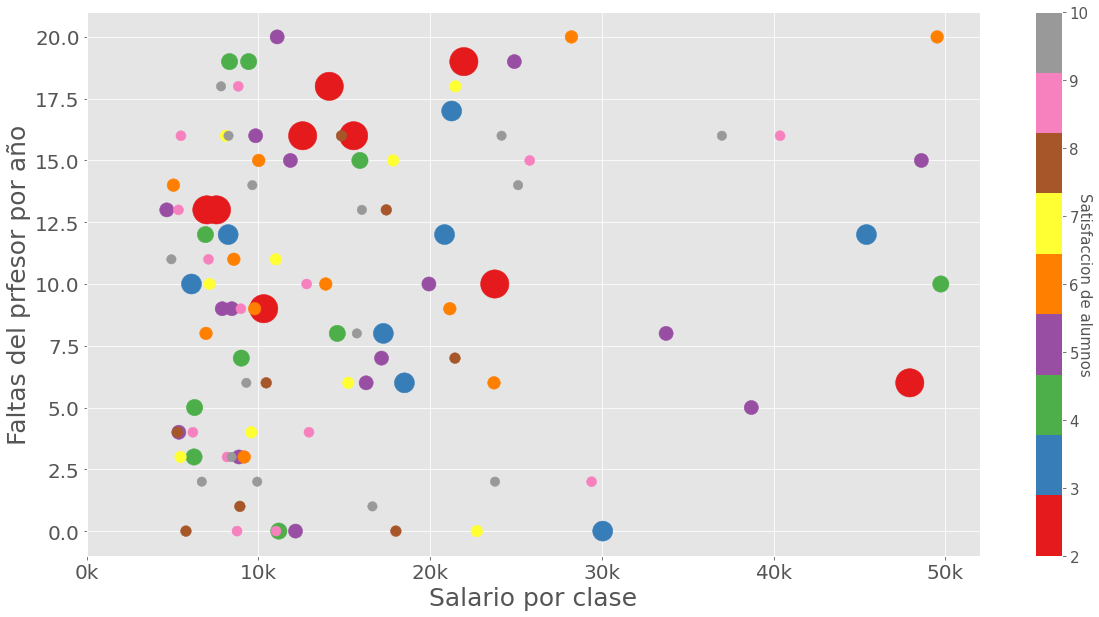

In [10]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.style.use('ggplot')

c = [int(i) for i in data3['Satisfaccion de alumnos']]
s = 800/(data3['Satisfaccion de alumnos']-1)
pos = plt.scatter(data3['Salario por clase'], data3['Faltas del prfesor por año'], c=c, cmap='Set1', s=s)

nsticks=5
x = np.array([10000*i for i in range(nsticks+1)])
my_xticks = [f"{int(x_value/1000)}k" for x_value in x]
plt.xticks(x, my_xticks, fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Salario por clase', fontsize=25)
plt.ylabel('Faltas del prfesor por año', fontsize=25)

#legend
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_ylabel('Satisfaccion de alumnos', rotation=270, fontsize=15)

# Forma 3. Se crea una métrica para calcular la ineficiencia por profesor

Se propone la métrica a partir de la creación de una gráfica radial para cada profesor, 
donde cada vértice está determinado por:
- Las faltas del profesor por año, en un rango de [0, 10]
- Salario por clase, normalizado a un rango de [0, 10]
- Insatisfacción de alumnos, definido por 10-Satisfaccion de alumnos

Considerando el triángulo generado en la gráfica radial, 
la Evaluación de Ineficianecia por profesor es el área del triángulo generado

In [11]:
df = data3.copy()
#Se reescalarán los valores para que estén en el rango [0, 10]
#Se crea una nueva columna
df['Insatisfaccion de alumnos'] = 10-df['Satisfaccion de alumnos']
df['Faltas del prfesor por año'] = df['Faltas del prfesor por año']/2
df['Salario por clase'] = 10*df['Salario por clase']/df['Salario por clase'].max()

df.drop(['Numero de clases que imparte', 'Salario', 'Satisfaccion de alumnos'], axis=1, inplace=True)
df.head()

,Profesores,Faltas del prfesor por año,Salario por clase,Insatisfaccion de alumnos
0,ALBERTO,9.5,4.415785,8.0
1,ÁNGEL,8.0,2.528547,8.0
2,JUAN MANUEL,6.5,1.406819,8.0
3,PABLO,8.0,3.125226,8.0
4,JORGE JESÚS,6.5,1.519390,8.0


In [12]:
def FormulaEron(val1, val2, val3):
    import math
    from math import pi
    from numpy.linalg import norm
    pto1, pto2, pto3 = [0, val1], [val2*math.sin(120*pi/180), val2*math.cos(120*pi/180)], [val3*math.sin(240*pi/180), val3*math.cos(240*pi/180)]
    
    a, b, c = norm(np.subtract(np.array(pto1), np.array(pto2))), norm(np.subtract(np.array(pto1), np.array(pto3))), norm(np.subtract(np.array(pto3), np.array(pto2)))
    s = (a+b+c)/2
    area = math.sqrt(s*(s-a)*(s-b)*(s-c))
    return area

In [13]:
#Se considera que los valores en cada columna es la distancia de cada vértice de un triángulo al centro
#el valor de ineficiencia del profesor será el área de dicho triángulo
Ineficiencia = []
for i in range(len(df)):
    inef_i = FormulaEron(df.iloc[i, 1], df.iloc[i, 2], df.iloc[i, 3])
    Ineficiencia.append(inef_i)
    
df['Evaluación de Ineficianecia'] = Ineficiencia
df.sort_values(by=['Evaluación de Ineficianecia'], ascending=False, inplace=True)

In [14]:
# df.to_excel('Evaluacion_Profesores.xlsx', index=False)  

## Resultados visuales

In [15]:
def graficaRadarvalues(data, categories, ax):  
    from math import pi  
    N = len(categories)
    
    values=data.iloc[1:].values.flatten().tolist()
    values += values[:1]
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Draw one axe per variable + add labels
    ax.set_xticks(angles[:-1], categories, color='black', size=10)

    # Draw ylabels
    ax.set_yticks([2, 4, 6, 8], ["2","4","6", "8"], color="grey", size=12)
    ax.set_ylim(0,10)
    ax.set_title(data[0])

    # Plot data
    #Valores promedio
    ax.plot(angles, [4.86, 3.15, 3.69, 4.86], linewidth=1, linestyle='solid', color='black', alpha=0.3)
    #Valores calculados
    ax.plot(angles, values, linewidth=1, linestyle='solid', color='red')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

### Se muestra la gráfica radial para cada profesor, para determinar el valor de ineficiencia
se agrega un triángulo de comparación, construido por la media de cada métrica

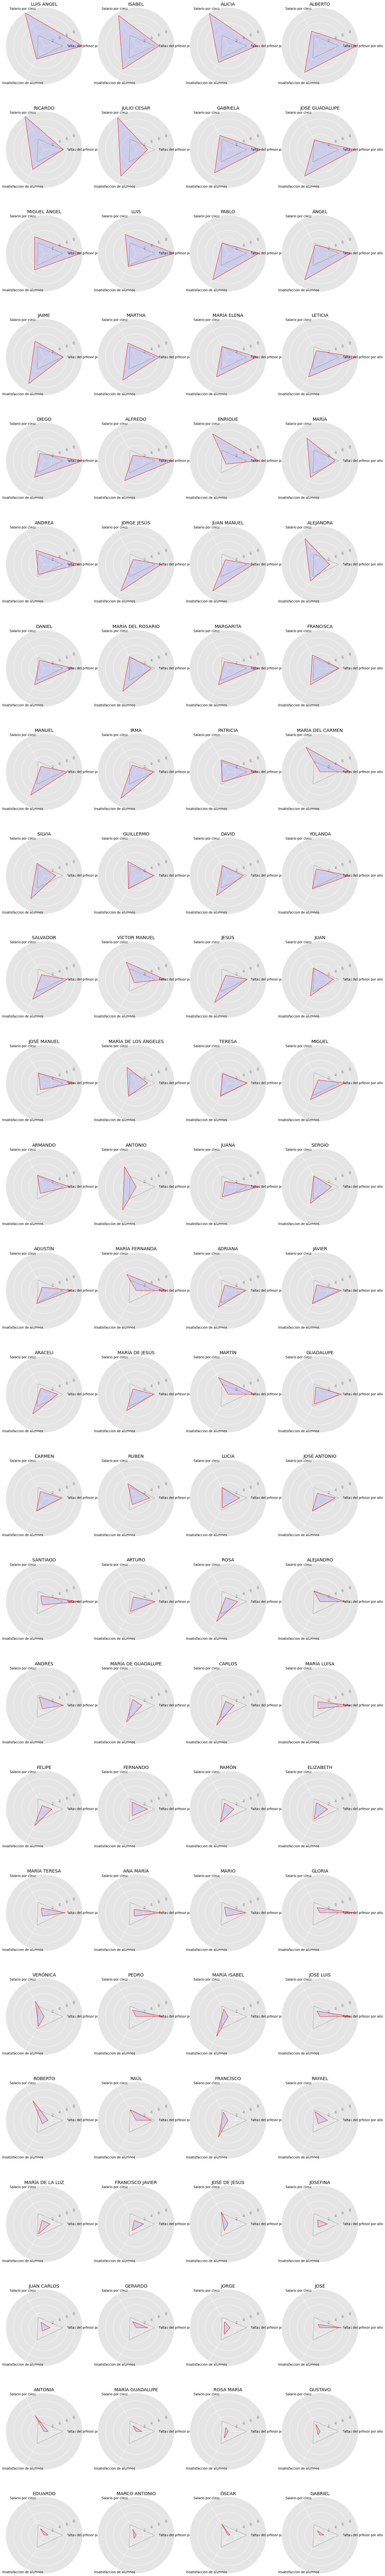

In [16]:
categories=df.columns.tolist()[1:4]
fig, ax = plt.subplots(25, 4, figsize=(20,150))

for i in range(100):
    ax = plt.subplot(25, 4, i+1, projection='polar')
    graficaRadarvalues(df.iloc[i, :4], categories, ax)
# fig.suptitle('Ranking de ineficiencia de profesores', fontsize=35)

## Se muestran los profesores con Evaluación de Ineficiencia más alto

In [17]:
df.head(10)

,Profesores,Faltas del prfesor por año,Salario por clase,Insatisfaccion de alumnos,Evaluación de Ineficianecia
44,LUIS ÁNGEL,10.0,9.957581,4.0,77.685136
15,ISABEL,6.0,9.129709,7.0,69.579175
32,ALICIA,7.5,9.772426,5.0,69.132782
0,ALBERTO,9.5,4.415785,8.0,66.370561
20,RICARDO,5.0,10.000000,6.0,60.621778
8,JULIO CESAR,3.0,9.636726,8.0,56.293375
16,GABRIELA,8.5,4.272848,7.0,54.442316
5,JOSÉ GUADALUPE,9.0,2.839921,8.0,52.082184
40,MIGUEL ÁNGEL,9.5,5.007137,5.0,52.006334
48,LUIS,10.0,5.675687,4.0,51.727529


In [23]:
data2.groupby(['Salario por clase', 'Satisfaccion de alumnos']).head()

,Profesores,Numero de clases que imparte,Salario,Satisfaccion de alumnos,Faltas del prfesor por año,Salario por clase
0,JUAN,2.0,34338.0,5.0,7.0,17169.00
1,JOSÉ LUIS,4.0,33038.0,10.0,16.0,8259.50
2,JOSÉ,5.0,24660.0,10.0,11.0,4932.00
3,MARÍA GUADALUPE,4.0,33744.0,10.0,3.0,8436.00
4,FRANCISCO,2.0,24322.0,5.0,0.0,12161.00
...,...,...,...,...,...,...
95,LUCÍA,3.0,45702.0,7.0,6.0,15234.00
96,ADRIANA,5.0,42247.0,5.0,9.0,8449.40
97,AGUSTÍN,4.0,20209.0,6.0,14.0,5052.25
98,MARÍA DE LA LUZ,5.0,27321.0,7.0,3.0,5464.20


In [20]:
data2.sort_values(by=['Salario por clase'], ascending=False)

,Profesores,Numero de clases que imparte,Salario,Satisfaccion de alumnos,Faltas del prfesor por año,Salario por clase
22,RICARDO,1.0,49742.0,4.0,10.0,49742.00
80,LUIS ÁNGEL,1.0,49531.0,6.0,20.0,49531.00
46,ALICIA,1.0,48610.0,5.0,15.0,48610.00
86,JULIO CESAR,1.0,47935.0,2.0,6.0,47935.00
91,ISABEL,1.0,45413.0,3.0,12.0,45413.00
...,...,...,...,...,...,...
73,ANA MARÍA,5.0,26724.0,9.0,13.0,5344.80
35,FRANCISCO JAVIER,4.0,21147.0,8.0,4.0,5286.75
97,AGUSTÍN,4.0,20209.0,6.0,14.0,5052.25
2,JOSÉ,5.0,24660.0,10.0,11.0,4932.00
